In [116]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename = '../data/ribfrac-val-images/RibFrac431-image.nii'
scan = nib.load(filename).get_fdata().T
filename = '../data/ribfrac-val-labels/RibFrac431-label.nii'
labels = nib.load(filename).get_fdata().T
filename = '../data/ribfrac-val-info.csv'
info = pd.read_csv(filename)
info = info[info.public_id == 'RibFrac431']

print(f'This scan contains {scan.shape[0]} slices of size {scan.shape[1]}x{scan.shape[2]}.')
print(f'Each slice is of type {scan.dtype} and weights {round(scan.nbytes / 1e6 / scan.shape[0])} MB.')

descriptions = [
    'Background', 
    'Displaced rib fracture', 
    'Non-displaced rib fracture', 
    'Buckle rib fracture', 
    'Segmental rib fracture', 
    'Ambiguous rib fracture'
]

This scan contains 369 slices of size 512x512.
Each slice is of type float64 and weights 2 MB.


# Inspect adjacent slices

Present in middle slice: ['Background', 'Buckle rib fracture']


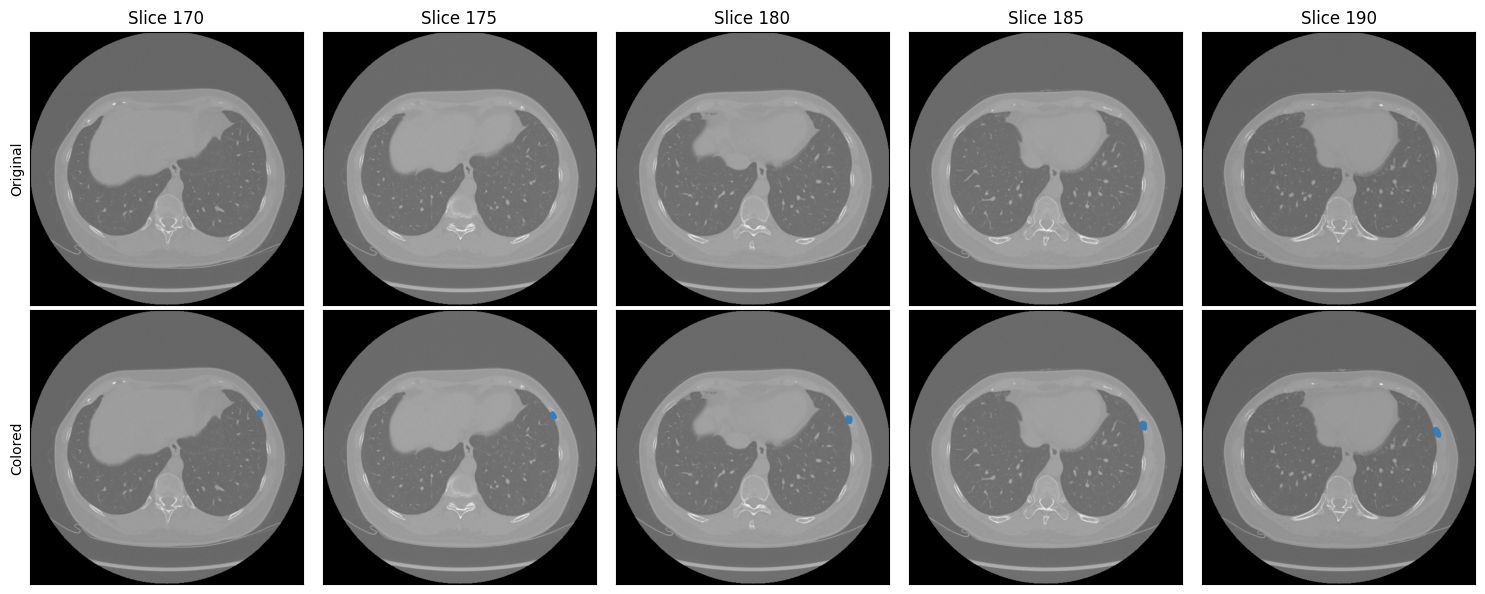

In [122]:
slice_id = 180

def color_labels(slice, labels_slice):
    slice = slice.copy()
    cm = plt.get_cmap('Set1')
    colors = np.array([(cm(1.*i/5)[:3]) for i in range(5)])*255
    for i in range(1,5):
        slice[labels_slice == i] = colors[i]
    return slice

print(f'Present in middle slice: {[descriptions[i] for i in info[info.label_id.isin(np.unique(labels[slice_id]))].label_code.values]}')

f, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    idx = slice_id + (i-2) * 5
    slice = scan[idx]
    slice = (((slice - slice.min()) / (slice.max() - slice.min())) * 255).astype(dtype=np.uint8)
    slice = np.stack([slice]*3, axis=-1)
    colored_slice = color_labels(slice, labels[idx])
    axes[0,i].imshow(slice)
    axes[0,i].set_title(f'Slice {idx}')
    axes[0,i].yaxis.set_ticks([])
    axes[0,i].xaxis.set_ticks([])
    axes[0,i].set_ylabel('Original') if i == 0 else None
    axes[1,i].imshow(colored_slice)
    axes[1,i].yaxis.set_ticks([])
    axes[1,i].xaxis.set_ticks([])
    axes[1,i].set_ylabel('Colored') if i == 0 else None
plt.tight_layout()
plt.show()